In [89]:
import os
import pandas as pd
import  matplotlib.pyplot as plt
import glob

import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

#### Merge data from each month into one CSV

## Joining the Data Using the Glob metho

In [90]:

# path = r'./Sales_Data' # use your path
#all_files = glob.glob(path + "/*.csv")

#li = []

#for filename in all_files:
    #df = pd.read_csv(filename, index_col=None, header=0)
    #li.append(df)

#frame = pd.concat(li, axis=0, ignore_index=True)

### Using another method

In [91]:
path = "./Sales_Data"
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

all_months_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    all_months_data = pd.concat([all_months_data, current_data])
    
all_months_data.to_csv("all_data_copy.csv", index=False)

In [92]:
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [93]:
all_months_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [94]:
all_months_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [95]:
all_months_data


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [96]:
all_months_data = all_months_data.dropna()

In [97]:
all_months_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### Now if I have to find the in which month the maximum sales has happend ?
### for that I have to create the sales coloumn and then the month coloumn

In [98]:
# creating sales coloumn 

# I have to convert the data type to int as all the data type is object

all_months_data['Quantity Ordered'] = pd.to_numeric(all_months_data['Quantity Ordered'], errors='coerce')
all_months_data['Price Each'] = pd.to_numeric(all_months_data['Price Each'], errors='coerce')

In [99]:
all_months_data['Sales'] = all_months_data['Quantity Ordered'] * all_months_data['Price Each']

In [100]:
all_months_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99
...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3.0,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",8.97
11682,259354,iPhone,1.0,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",700.00
11683,259355,iPhone,1.0,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",700.00
11684,259356,34in Ultrawide Monitor,1.0,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",379.99


In [101]:
all_months_data['Months'] = all_months_data['Order Date'].str[0:2]

In [102]:
all_months_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Months
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,04
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,04
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,04
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,04
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,04
...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3.0,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",8.97,09
11682,259354,iPhone,1.0,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",700.00,09
11683,259355,iPhone,1.0,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",700.00,09
11684,259356,34in Ultrawide Monitor,1.0,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",379.99,09


In [103]:
all_months_data['Months'] = pd.to_numeric(all_months_data['Months'], errors='coerce')

In [104]:
all_months_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Months
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4.0
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4.0
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4.0
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4.0
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,4.0
...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3.0,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",8.97,9.0
11682,259354,iPhone,1.0,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",700.00,9.0
11683,259355,iPhone,1.0,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",700.00,9.0
11684,259356,34in Ultrawide Monitor,1.0,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",379.99,9.0


In [105]:
all_months_data.isnull().sum()

Order ID              0
Product               0
Quantity Ordered    355
Price Each          355
Order Date            0
Purchase Address      0
Sales               355
Months              355
dtype: int64

In [106]:
all_months_data = all_months_data.dropna()

In [107]:
all_months_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Months
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4.0
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4.0
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4.0
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4.0
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,4.0
...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3.0,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",8.97,9.0
11682,259354,iPhone,1.0,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",700.00,9.0
11683,259355,iPhone,1.0,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",700.00,9.0
11684,259356,34in Ultrawide Monitor,1.0,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",379.99,9.0


In [108]:
all_months_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Sales               0
Months              0
dtype: int64

In [109]:
all_months_data['Months'] = all_months_data['Months'].astype('int')

In [110]:
all_months_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Months
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,4
...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3.0,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",8.97,9
11682,259354,iPhone,1.0,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",700.00,9
11683,259355,iPhone,1.0,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",700.00,9
11684,259356,34in Ultrawide Monitor,1.0,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",379.99,9


In [111]:
all_months_data['Quantity Ordered'] = all_months_data['Quantity Ordered'].astype('int')

In [112]:
all_months_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Months
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,4
...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",8.97,9
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",700.00,9
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",700.00,9
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",379.99,9


In [113]:
# to seprate the city data into a different column lets use the apply method


all_months_data['City'] = all_months_data['Purchase Address'].apply(lambda x : x.split(',')[1])


# we can also use the function method to get the city coloumn

#def get_city(Address):
   # return Address.split(',')[1]

#all_months_data['City'] = all_months_data['Purchase Address'].apply(lambda x : get_city(x))

In [114]:
all_months_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Months,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles
...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",8.97,9,Los Angeles
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",700.00,9,San Francisco
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",700.00,9,San Francisco
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",379.99,9,San Francisco



## lets find out the highest sales for a month 




In [115]:
highest_sales = all_months_data.groupby('Months').sum()

In [116]:
highest_sales

,Quantity Ordered,Price Each,Sales
Months,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


range(1, 13)


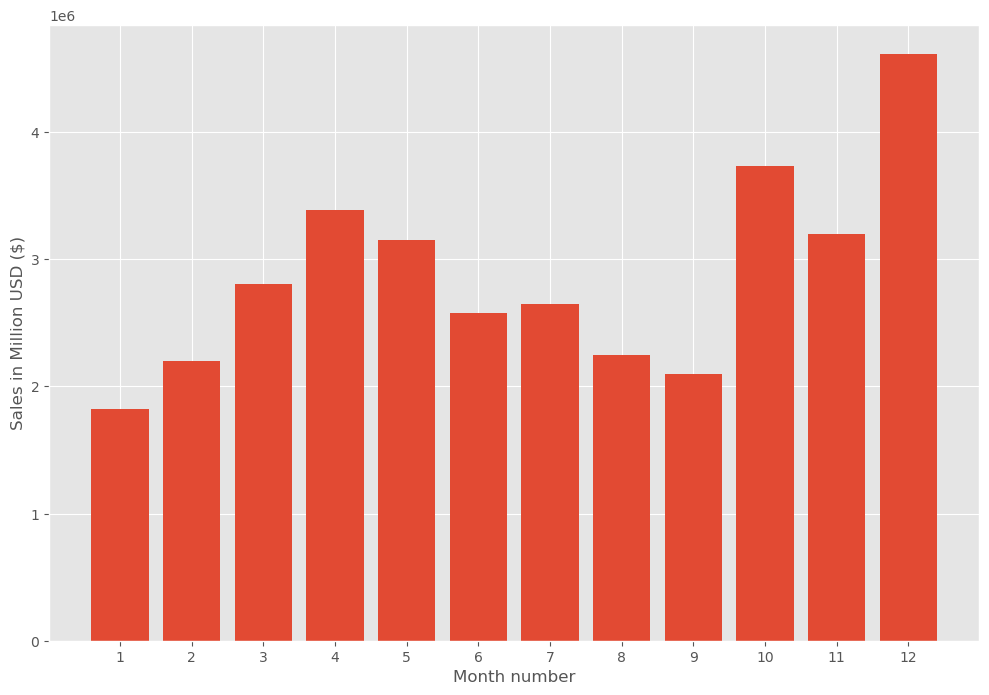

In [117]:
months = range(1,13)

print(months)

plt.bar(months,all_months_data.groupby(['Months']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Sales in Million USD ($)')
plt.xlabel('Month number')
plt.show()

## Question 2: What city sold the most product?

In [118]:
all_months_data.groupby(['City']).sum()

,Quantity Ordered,Price Each,Sales,Months
City,,,,
Atlanta,16602,2779908.20,2795498.58,104794
Austin,11153,1809873.61,1819581.75,69829
Boston,22528,3637409.77,3661642.01,141112
Dallas,16730,2752627.82,2767975.40,104620
Los Angeles,33289,5421435.23,5452570.80,208325
New York City,27932,4635370.83,4664317.43,175741
Portland,14053,2307747.47,2320490.61,87765
San Francisco,50239,8211461.74,8262203.91,315520
Seattle,16553,2733296.01,2747755.48,104941


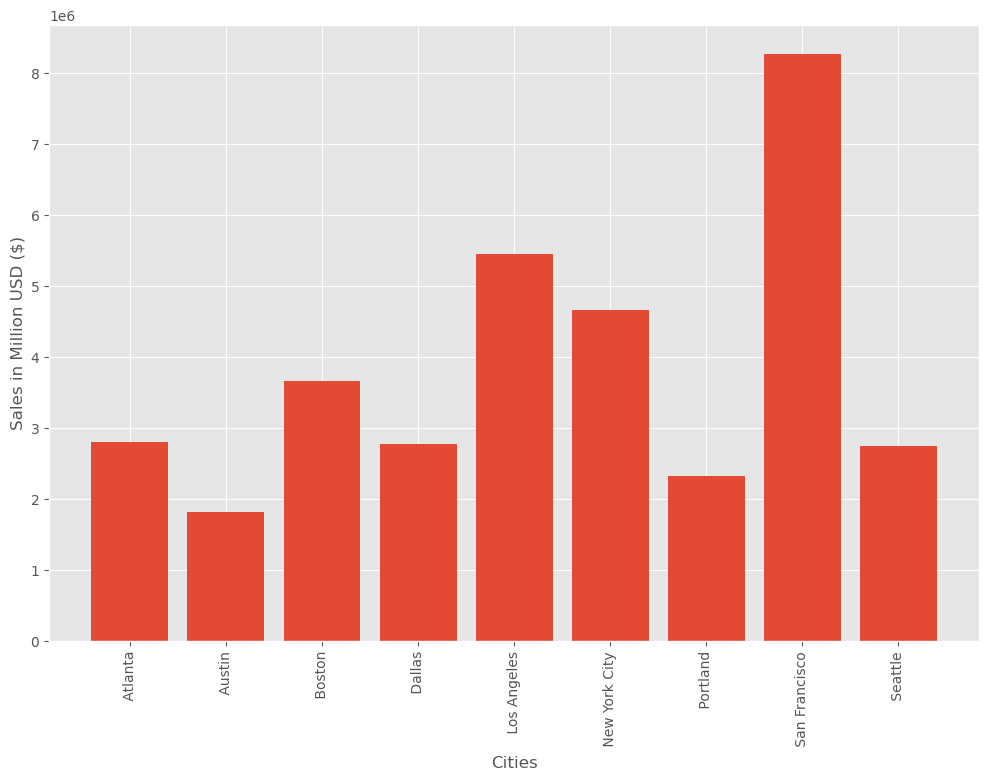

In [119]:
keys = [city for city, df in all_months_data.groupby(['City'])]

plt.bar(keys,all_months_data.groupby(['City']).sum()['Sales'])
plt.ylabel('Sales in Million USD ($)')
plt.xlabel('Cities')
plt.xticks(keys, rotation='vertical', size=10)
plt.show()

## Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [120]:
# Add hour column

all_months_data['Order Date'] = pd.to_datetime(all_months_data['Order Date'])


In [121]:
all_months_data['Hour'] = pd.to_datetime(all_months_data['Order Date']).dt.hour
all_months_data['Minute'] = pd.to_datetime(all_months_data['Order Date']).dt.minute
all_months_data['Count'] = 1
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Months,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,Dallas,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston,22,30,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles,14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles,14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles,9,27,1


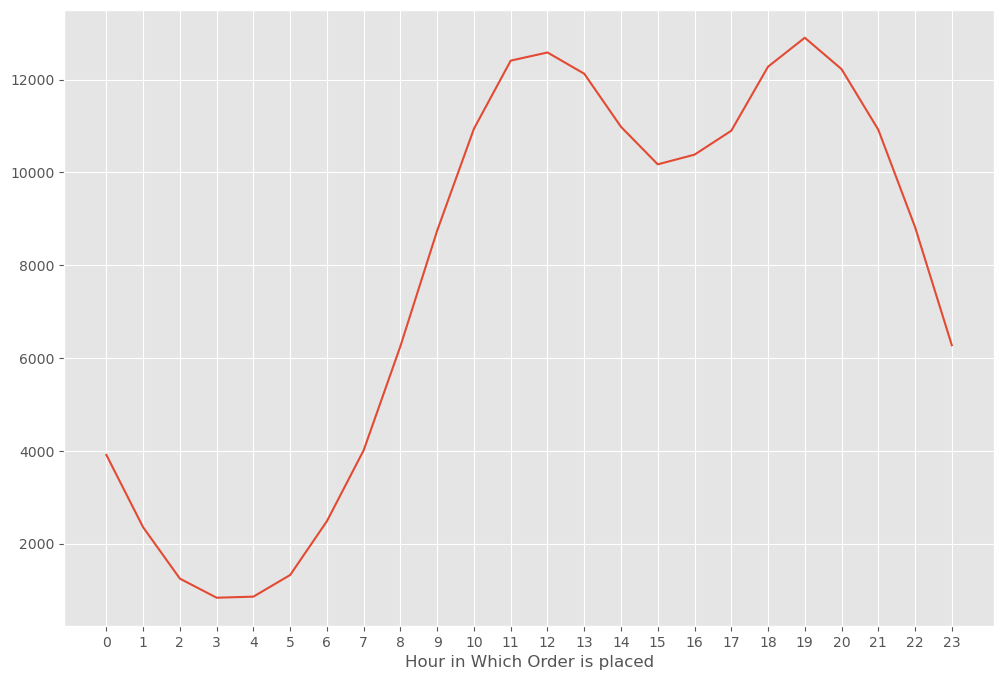

In [122]:
keys = [pair for pair, df in all_months_data.groupby(['Hour'])]

plt.plot(keys, all_months_data.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.xlabel('Hour in Which Order is placed')
plt.show()

## what product are often sold together

#### To find this we have to find what are the product are ordered together which  can be found from the order ID as if the same order ID is used to buy another product and then we can group them in a different coloumn 

In [124]:
df = all_months_data[all_months_data['Order ID'].duplicated(keep = False)] # refered to the stackoverflow 
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Months,City,Hour,Minute,Count
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles,14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles,14,38,1
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",600.00,4,Los Angeles,19,42,1
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",11.95,4,Los Angeles,19,42,1
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",99.99,4,Boston,11,31,1
...,...,...,...,...,...,...,...,...,...,...,...,...
11628,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",3.84,9,Atlanta,20,18,1
11639,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",11.99,9,Atlanta,0,25,1
11640,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",5.98,9,Atlanta,0,25,1
11677,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",600.00,9,San Francisco,13,49,1


In [128]:
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Months,City,Hour,Minute,Count,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles,14,38,1,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles,14,38,1,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",600.00,4,Los Angeles,19,42,1,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",11.95,4,Los Angeles,19,42,1,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",99.99,4,Boston,11,31,1,"Bose SoundSport Headphones,Bose SoundSport Hea..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11628,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",3.84,9,Atlanta,20,18,1,"34in Ultrawide Monitor,AA Batteries (4-pack)"
11639,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",11.99,9,Atlanta,0,25,1,"Wired Headphones,AAA Batteries (4-pack)"
11640,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",5.98,9,Atlanta,0,25,1,"Wired Headphones,AAA Batteries (4-pack)"
11677,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",600.00,9,San Francisco,13,49,1,"Google Phone,USB-C Charging Cable"


In [131]:
df = df[['Order ID' , 'Grouped']].drop_duplicates()
df

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
11617,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
11619,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
11627,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
11639,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [133]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

print(count)  # to make it more clear we can use the below method 

Counter({('iPhone', 'Lightning Charging Cable'): 1005, ('Google Phone', 'USB-C Charging Cable'): 987, ('iPhone', 'Wired Headphones'): 447, ('Google Phone', 'Wired Headphones'): 414, ('Vareebadd Phone', 'USB-C Charging Cable'): 361, ('iPhone', 'Apple Airpods Headphones'): 360, ('Google Phone', 'Bose SoundSport Headphones'): 220, ('USB-C Charging Cable', 'Wired Headphones'): 160, ('Vareebadd Phone', 'Wired Headphones'): 143, ('Lightning Charging Cable', 'Wired Headphones'): 92, ('Lightning Charging Cable', 'Apple Airpods Headphones'): 81, ('Vareebadd Phone', 'Bose SoundSport Headphones'): 80, ('USB-C Charging Cable', 'Bose SoundSport Headphones'): 77, ('Apple Airpods Headphones', 'Wired Headphones'): 69, ('Lightning Charging Cable', 'USB-C Charging Cable'): 58, ('Lightning Charging Cable', 'AA Batteries (4-pack)'): 55, ('Lightning Charging Cable', 'Lightning Charging Cable'): 54, ('Bose SoundSport Headphones', 'Wired Headphones'): 53, ('AA Batteries (4-pack)', 'Lightning Charging Cable')

In [134]:
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

In [135]:
for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


## What product sold the most? Why do you think it sold the most?

In [136]:
all_months_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Months,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,Dallas,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston,22,30,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles,14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles,14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles,9,27,1
...,...,...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",8.97,9,Los Angeles,20,56,1
11682,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",700.00,9,San Francisco,16,0,1
11683,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",700.00,9,San Francisco,7,39,1
11684,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",379.99,9,San Francisco,17,30,1


In [142]:
product_group = all_months_data.groupby('Product').sum()
product_group

,Quantity Ordered,Price Each,Sales,Months,Hour,Minute,Count
Product,,,,,,,
20in Monitor,4129,451068.99,454148.71,29336,58764,122252,4101
27in 4K Gaming Monitor,6244,2429637.70,2435097.56,44440,90916,184331,6230
27in FHD Monitor,7550,1125974.93,1132424.50,52558,107540,219948,7507
34in Ultrawide Monitor,6199,2348718.19,2355558.01,43304,89076,183480,6181
AA Batteries (4-pack),27635,79015.68,106118.40,145558,298342,609039,20577
AAA Batteries (4-pack),31017,61716.59,92740.83,146370,297332,612113,20641
Apple Airpods Headphones,15661,2332350.00,2349150.00,109477,223304,455570,15549
Bose SoundSport Headphones,13457,1332366.75,1345565.43,94113,192445,392603,13325
Flatscreen TV,4819,1440000.00,1445700.00,34224,68815,142789,4800


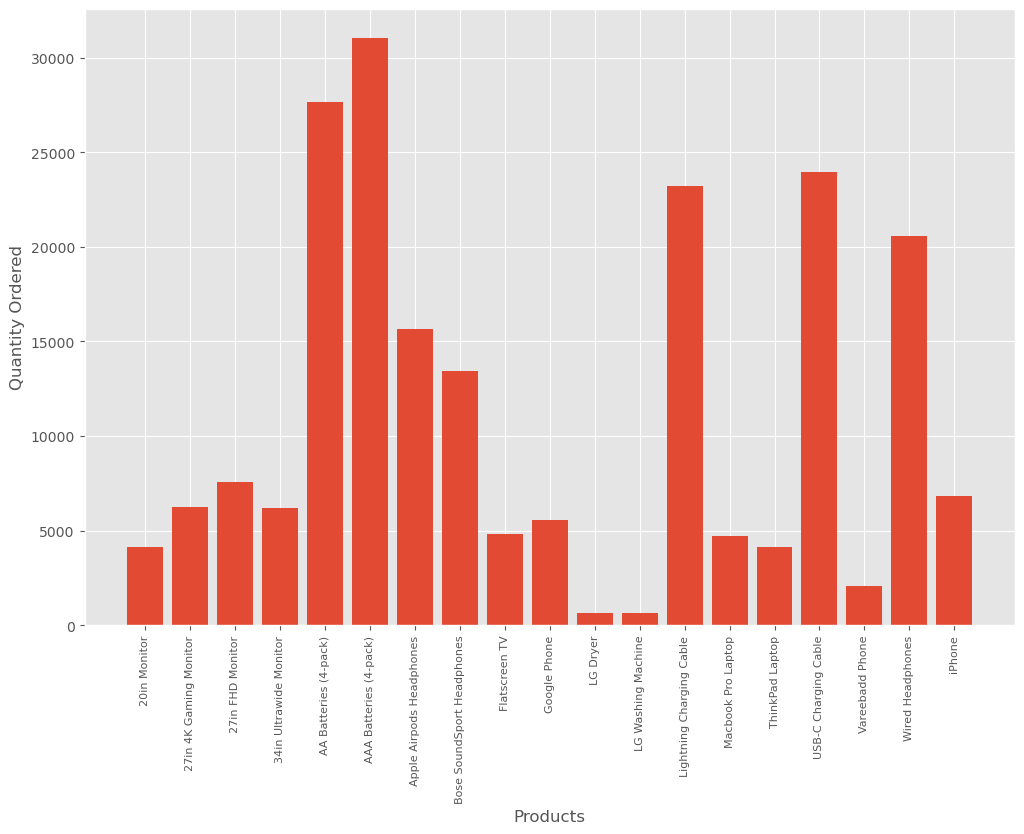

In [150]:
product_group = all_months_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']
products = [product for product, df in product_group]
plt.bar(products,quantity_ordered)
plt.xlabel('Products')
plt.ylabel('Quantity Ordered')
plt.xticks(products, rotation = 'vertical' , size= 8)
plt.show()

In [153]:
prices = all_months_data.groupby('Product').mean()['Price Each']
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

C:\Users\stiwaram\AppData\Local\Temp\ipykernel_47300\690855081.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)
C:\Users\stiwaram\AppData\Local\Temp\ipykernel_47300\690855081.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


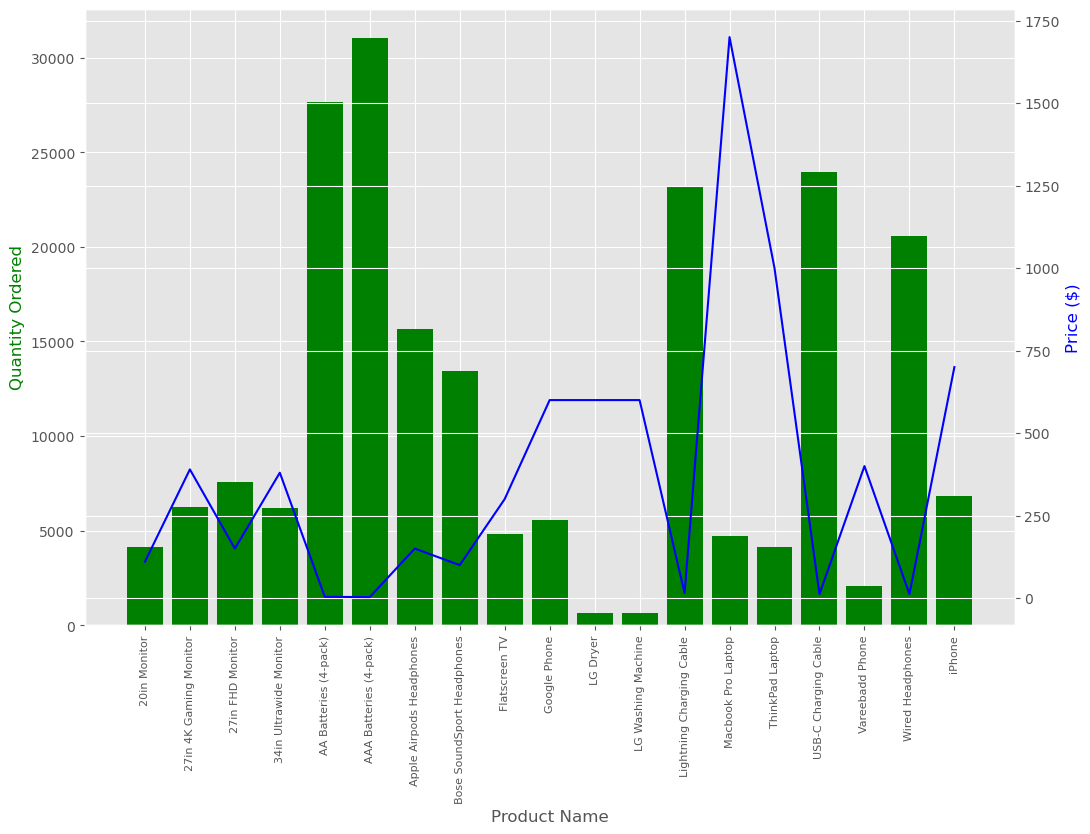

In [155]:
prices = all_months_data.groupby('Product').mean()['Price Each']  # referred to the stack overflow for this chart 

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

fig.show()  